TP DE MACHINE LEARNING !!!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('WineQT.csv')

VISUALISATION DES DONNEES

In [11]:
import numpy as np
import matplotlib.pyplot as plt

d=df["quality"]
x=[]
y=[]
for loop in range(len(d)):
    x.append(d[loop])
    if(d[loop]>5):
        y.append(1)
    else:
        y.append(0)

print(x)
print(y) 

[5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 4, 6, 5, 4, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 4, 5, 6, 5, 4, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 4, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 4, 5, 5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 4, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 4, 7, 6, 7, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 7, 7, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 7, 5, 4, 5, 5, 5, 4, 8, 6, 6, 6, 6, 6, 6, 8, 7, 6, 7, 7, 5, 5, 6, 6, 7, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 6, 7, 5, 6, 5, 7, 7, 6, 5, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 7, 6, 5, 6, 5, 5, 7, 7, 5, 7, 6, 6, 6, 7, 6, 6, 5, 6, 8, 6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 7, 4, 6, 5, 7, 5, 5, 6, 5, 6, 5, 7, 5, 7, 7, 6, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 5, 8, 7, 7, 5, 5, 6, 6, 6, 6, 7, 5, 8, 5, 5, 3, 6, 5, 6, 6, 6, 6, 5, 5, 

In [20]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(loop)
            pos.append(X[loop])
        else:
            idneg.append(loop)
            neg.append(X[loop])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

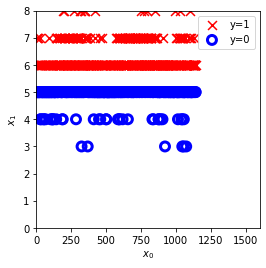

In [21]:


fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([0, 1600, 0, 8])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

[   0    1    2 ... 1197 1198 1199]


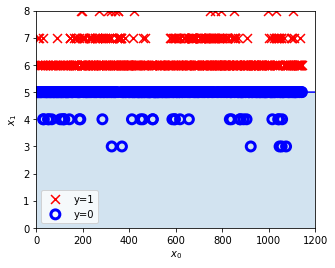

In [22]:
# Choose values between 0 and 6
x0 = np.arange(1200)
print(x0)
import math
x1 = x0*0+5
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 1200, 0, 8])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(x,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()